In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg

This notebook repurposes code presented here: https://www.marksmath.org/visualization/orbits/CentralOrbit.html

# View on the show

<IPython.core.display.Javascript object>


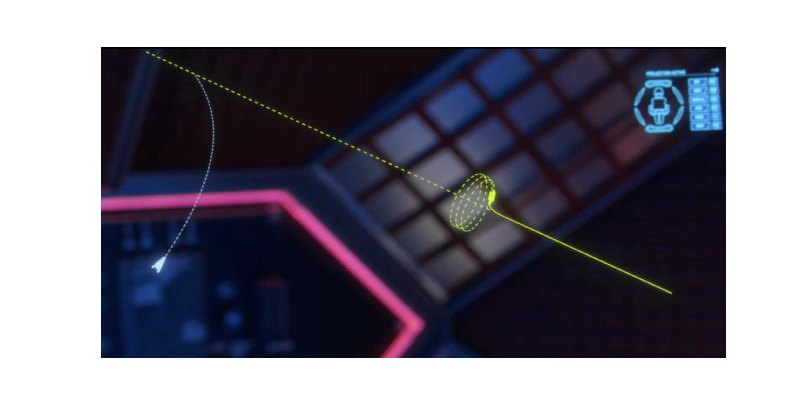

(-0.5, 2591.5, 1329.5, -0.5)

In [2]:
img=mpimg.imread('show_view.png')
plt.figure(figsize=(9,4.5))
plt.imshow(img,aspect='auto')
plt.axis('off')

# View from Razorback

In [3]:
# Parameters
G = .3
x0 = 0
y0 = 0
vx0 = 0
vy0 = 1000 # some initial velocity choice

# In the following definition of F, s is a state vector whose components represent the following:
#   s[0]: Horizontal or x position
#   s[1]: Vertical or y position
#   s[2]: Horizontal velocity
#   s[3]: Vertical velocity
# In general, F can depend upon time t as well. Although our F is independent of t, we still need to
# indicate that it is a possible variable.

def F(s,t): 
    f = [s[2],s[3],
         G*np.sin(t*np.pi/180),
         G*np.cos(t*np.pi/180),]
    return f

t = np.arange(0,1000)

# Solve the differential equation to get the velocity and distance components
solution = odeint(F,[x0,y0,vx0,vy0],t)

x = solution[:,0]
y = solution[:,1]

<IPython.core.display.Javascript object>


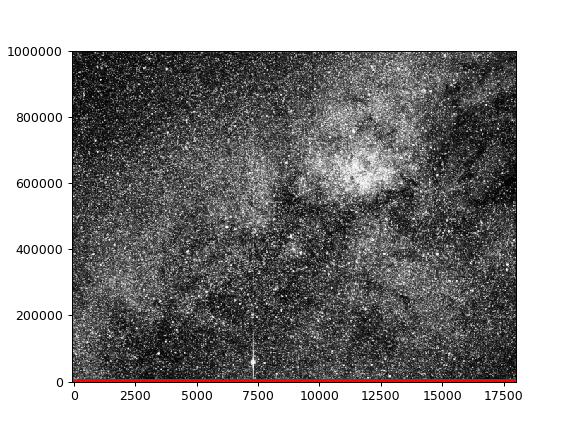

In [4]:
bkg=mpimg.imread('tess_bkg.jpg')
fig, ax = plt.subplots()
plt.imshow(bkg,extent=((-100, 18000,-100, 1e6)),cmap='gray')
plt.gca().set_aspect('auto', adjustable='box')


xdata, ydata = [], []
ln, = plt.plot([], [], 'r.')

def init():
    ax.set_xlim(-100, 18000)
    ax.set_ylim(-100, 1e6)
    return ln,

def update(frame):
    xdata.append(x[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)
    return ln,
ani = []
ani = FuncAnimation(fig, update, frames=np.arange(0,len(x)),init_func=init, blit=True,interval=1)

# View from an initially co-moving observer

Relative velocity is initially 0.

<IPython.core.display.Javascript object>


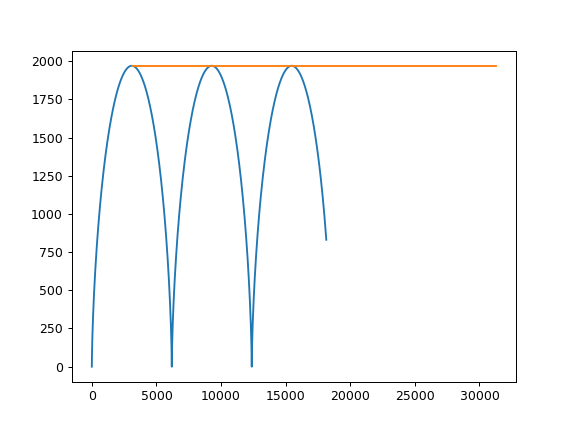

In [33]:
# Parameters
G = .3
x0 = 0
y0 = 0
vx0 = 0
vy0 = 0

def F(s,t): 
    f = [s[2],s[3],
    G*np.sin(t*np.pi/180),
    G*np.cos(t*np.pi/180),]
    return f

def Fn(s,t): 
    f = [s[2],s[3],0,0]
    return f

t = np.arange(0,1000)

# Solve it!
solution = odeint(F,[x0,y0,vx0,vy0],t)

x = solution[:,0]
y = solution[:,1]

jumptime = 180
xn0 = solution[jumptime,0]
yn0 = solution[jumptime,1]
vxn0 = solution[jumptime,2]
vyn0 = solution[jumptime,3]
solution2 = odeint(Fn,[xn0,yn0,vxn0,vyn0],t[jumptime:])

xn = solution2[:,0]
yn = solution2[:,1]

plt.figure()
plt.plot(x,y)
plt.plot(xn,yn)

In [29]:
print(xn)

[6187.94406119 6187.9440606  6187.94406002 6187.94405944 6187.94405885
 6187.94405827 6187.94405769 6187.9440571  6187.94405652 6187.94405594
 6187.94405535 6187.94405477 6187.94405419 6187.9440536  6187.94405302
 6187.94405244 6187.94405185 6187.94405127 6187.94405069 6187.9440501
 6187.94404952 6187.94404894 6187.94404835 6187.94404777 6187.94404719
 6187.9440466  6187.94404602 6187.94404544 6187.94404485 6187.94404427
 6187.94404369 6187.94404311 6187.94404252 6187.94404194 6187.94404136
 6187.94404077 6187.94404019 6187.94403961 6187.94403902 6187.94403844
 6187.94403786 6187.94403727 6187.94403669 6187.94403611 6187.94403552
 6187.94403494 6187.94403436 6187.94403377 6187.94403319 6187.94403261
 6187.94403202 6187.94403144 6187.94403086 6187.94403027 6187.94402969
 6187.94402911 6187.94402852 6187.94402794 6187.94402736 6187.94402677
 6187.94402619 6187.94402561 6187.94402503 6187.94402444 6187.94402386
 6187.94402328 6187.94402269 6187.94402211 6187.94402153 6187.94402094
 6187.9

<IPython.core.display.Javascript object>


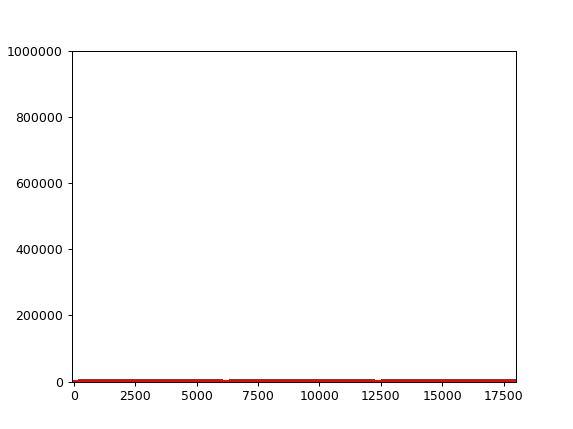

In [26]:
bkg=mpimg.imread('tess_bkg.jpg')
ind = np.argsort(x)
x = x[ind]
y = y[ind]
fig, ax = plt.subplots()
plt.imshow(bkg,extent=((-100, 18000,-100, 2100)),cmap='gray')
plt.gca().set_aspect('auto', adjustable='box')


xdata, ydata = [], []
ln, = plt.plot([], [], 'r.')

def init():
    ax.set_xlim(-100, 18000)
    ax.set_ylim(-100, 2100)
    return ln,

def update(frame):
    xdata.append(x[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)
    return ln,
ani = []
ani = FuncAnimation(fig, update, frames=np.arange(0,len(x)),init_func=init, blit=True,interval=1)

# View from an inertial frame moving with the average $x$ velocity

Observer is centered on the origin of the circle which is describes the above motion

<IPython.core.display.Javascript object>


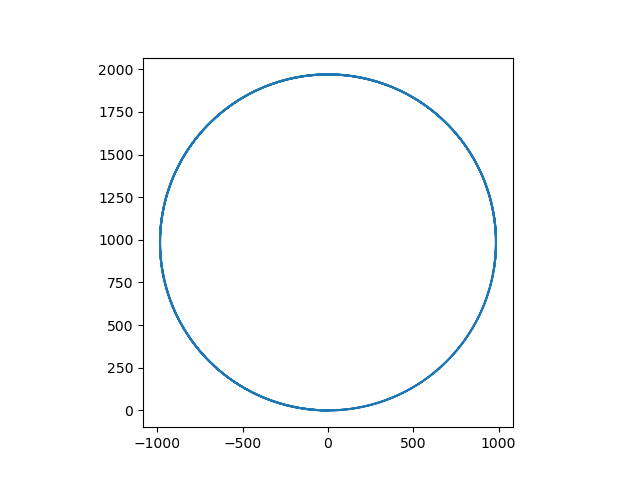

In [6]:
vx = solution[:,2]
vel = np.mean(vx[:360])
comover = -t.copy() * vel

x = solution[:,0]
y = solution[:,1]




plt.figure()
plt.plot(x + comover,y)
plt.gca().set_aspect('equal', adjustable='box')

In [8]:
bkg=mpimg.imread('tess_bkg.jpg')
ind = np.argsort(x)
x = x[ind]
y = y[ind]
fig, ax = plt.subplots()
plt.imshow(bkg,extent=((-1100, 1100,-100, 2100)),cmap='gray')
#plt.gca().set_aspect('auto', adjustable='box')


xdata, ydata = [], []
ln, = plt.plot([], [], 'r.')

def init():
    ax.set_xlim(-1100, 1100)
    ax.set_ylim(-100, 2100)
    return ln,

def update(frame):
    xdata.append(x[frame]+comover[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)
    return ln,
ani = []
ani = FuncAnimation(fig, update, frames=np.arange(0,len(x)),init_func=init, blit=True,interval=1)

<IPython.core.display.Javascript object>